1. Fix the model's understanding of fingers.

2. Video: Fix the issues of objects suddenly disappearing or changing color.

3. Make the model understand stuff like "Empire State Building on it's side" which it currently doesn't understand.

4. Conditional stable diffusion and image-to-image take text &/or an image as input. But what other modalities can be taken as input? Sound? (e.g., music / a bird call) / speech (in particular the emotion & gender / accent aspects of voice - imagine creating a talking video character (realistic / cartoony) based on voice only! - you can create a video radio station / podcast from speech alone; the lip movements should be based on the text, target language & time alignment; use CLIP for audio encoding?) Tabular data? (e.g., generate visualizations from an Excel sheet)

5. An image captioning model uses an image encoder and an autoregressive text decoder. Is there any equivalent to the next token prediction task in computer vision? Next pixel prediction? Next patch prediction? The latter may be possible. If so, then is it possible to replace diffusion models with the analogue of image captioning models, i.e., encode the text, and use an auto-regressive decoder to generate the image? How about using diffusion to generate the initial patch, and then using auto-regression to generate the rest? Then we can create a Midjourney-like zoom out feature.

6. Have the concepts of guidance scale, negative prompt, sound-to-sound, textual inversion & DreamBooth been implemented for audio stable diffusion / other modalities? If not, they may be opportunities, especially sound-to-sound.

7. Not related to stable diffusion: Has a high-quality audio captioning model been created? This should work similarly to image captioning.

8. The textual inversion trick of fine-tuning a single token: Can it not be used for models like T5 / Donut to teach them new concepts (without having to fine-tune the full model)? Try it out on T5 and Donut to add new tasks / keys to an existing fine-tuned model! Compare the results to a stage-1 model fine-tuned on the full dataset with all the tasks / keys. Explore how this is related to machine unlearning: Can it be used to forget just a single task / key? The latter may be a new type of unlearning. So far, unlearning has focused on forgetting training examples, but not full concepts. (Perhaps just resetting the embedding vector for that task / key special token to random values will do the trick?)

9. A one-shot style transfer model. Input a new image and a reference image (containing a style), and the model should be able to perform style transfer. Does it already exist? This is as opposed to full pre-training / fine-tuning (on a particular style without prompting, or a limited set of styles with prompting) / textual inversion approaches.

10. Research ideas related to DreamBooth mentioned in Lesson 9:

> Other ideas that may work include: use Exponential Moving Average (EMA) so that the final weights preserve some of the previous knowledge, use progressive learning rates for fine-tuning, or combine the best of Textual Inversion with DreamBooth. These could make for some interesting projects to try out!

These are related to prior preservation.

11. Jeremy's formulation of Stable Diffusion: According to him, it can take you in some innovative research directions. What are they?

12. **Repetition of a point in 'Lesson_9_Notes.ipynb' because it's a research idea:** The first function (`f`) he mentions: it outputs the probability that an image is a handwritten digit. Why not just create a binary classification model (with a single output unit & a sigmoid activation function)? The model can be trained using MNIST (handwritten digits) & Fashion-MNIST (not handwritten digits)! According to Jeremy, if we have this function, we can actually use it to generate handwritten digits. **Note:** With the MNIST, Fashion-MNIST approach, you don't have to start with random noise to perform gradient ascent.

13. **Repetition of a point in 'Lesson_9_Notes.ipynb' because it's a research idea:** For `f.backward()` and `X_3.grad` to work, we need `X_3` to have `requires_grad=True`. But `X_3` is an image (an input tensor with `requires_grad=False`), not an `nn.Parameter` with `requires_grad=True`. So how would that work? A hack might be: after the model is trained, freeze all it's parameters. Then set `requires_grad=True` for the input tensor. And do a forward pass without using the `torch.no_grad()` context manager. Then you might be able to get the gradient of `f` w.r.t. `X_3`? **Note:** This idea of starting from an input, and changing it (using gradient ascent) till it becomes something else might be more general than just the image generation task. What other tasks could we use this strategy for? Accent softening? Music enhancement (e.g., adding more instruments)? Style transfer? What else? (First, we have to validate that this strategy works using the MNIST dataset.)

14. A potential alternative to using a UNet to predict noise: Maybe generate 784 length vector labels for amount of noise added to an image, and train an MLP regression model to predict that?

15. Apart from Stable Diffusion, in what other situations is training a large neural net prohibitively expensive? Video data? Can we use a VAE to compress the data in such cases? Can this be used to perform modeling experiments that are currently only accessible to the largest AGI labs due to compute limitations?

16. The idea of contrastive loss - it is surely being used in audio applications as well, such as zero shot audio classification and audio diffusion. What other audio applications does contrastive loss have? What about other modalities such as video (GIFs for example), tabular data, graphs & charts, etc? What are the potential applications of putting two different modalities into the same space?

17. Related to above: Is text the only form of guidance possible? How about reversing the process? That it, providing the model an image, and asking it to generate some text / audio / video data. (This is already done for image captioning. But the idea is: can we do diffusion? What would the inputs & outputs of such a model look like?) How about an audio file as guidance for audio stable diffusion? (This is not about creating an audio-to-audio pipeline. This is about using an input audio as guidance. For example, in the case of accent conversion.)

18. **Repetition of a point in 'Lesson_9_Notes.ipynb' because it's a research idea:** Questions like how to choose the value of the constant `c` are decided by the "*diffusion sampler*". But this looks a lot like deep learning optimizers (Momentum, RMSProp, Adam, etc). In a deep learning optimizer, the constant `c` is the learning rate. So concepts such as momentum should be applicable to diffusion samplers as well! This is an area of research that Jeremy is exploring. Diffusion models originally came from the world of differential equations. And there are a whole lot of parallel concepts in the two worlds of (a) optimizers and (b) differential equations. And so, differential equation solvers use a lot of the same kinds of ideas that deep learning optimizers use. One thing that differential equation solvers do is that they tend to take '*time*' as an input. And in fact, pretty much all diffusion models take not just the noisy latent and the prompt as an input; they also take '*time*' as an input. The idea is: the model will be better at removing the noise if you tell it how much noise still exists (after removing noise in the previous time steps). Jeremy very strongly suspects that this premise is incorrect, because figuring out how noisy an image is should be very straightforward for a fancy neural net. (**Idea:** Train a separate regression model to do this, i.e., predict how much noise there is. Or maybe use an auxilliary target in the same neural net.) So Jeremy very much doubts that we actually need to pass in '*time*' as an input. And as soon as you stop doing that, things stop looking like differential equations, and they start looking like optimizers.

19. **Repetition of a point in 'Lesson_9_Notes.ipynb' because it's a research idea:** We decided that the loss function of the UNet is MSE. The truth is, in statistics & ML, every time you see somebody use MSE, it's because the math worked out easier that way. What if we replaced MSE with more sophisticated loss functions like "*perceptual loss*"? This loss function tells us: after removing noise from a noisy latent, how good is the noisy latent? Does it look like a (compressed) digit? Does it have the qualities of a (compressed) digit?

20. Self-supervised learning: (i) In vision, these are the current types: https://www.fast.ai/posts/2020-01-13-self_supervised.html The question: Are there better self-supervised learning tasks that you can envision? The efficacy can be measured based on performance on downstream tasks. (ii) In NLP, what else can be there apart from next token prediction, fill mask and next sentence prediction? If you can invent a new type, you can change language models forever. Examine the above vision examples for some ideas. Even if it doesn't replace next token prediction, it could become an auxilliary task that improves the performance of language models.

21. Can self-supervised learning be used to pre-train a CV model for specialized images for which ImageNet pre-trained models aren't useful? Examples could be certain types of medical images. Can publish high quality pre-trained models for medical imaging using this approach. Do this!

22. What tasks are the current pre-trained models for audio trained on? What does self-supervised learning for audio look like? What about for tabular data?

23. Are there causal / masked LMs for audio? If so, do we perform domain adaptation before fine-tuning? Both of these questions have potential to turn into papers.

24. RLHF / DPO can also be used to optimize for the level of disharmony (given the right type of labeled data). Furthermore, you could optimize one model for agreeableness and another model for disagreeableness. These could then be released upon social media platforms to wreak havoc. This is a good research area under AI safety.

25. Train a causal speech language model using a modified version of AWD_LSTM and an audio version of Jeremy's human numbers dataset. Do a literature review on what kinds of language / self-supervised pre-trained models are available for audio.

26. Train a speech-to-speech translation model using an audio version of Jeremy's human numbers dataset. Use TTS to create the dataset.

27. Train the above model with time alignment. Then try (i) background music preservation and (ii) background noise removal.

28. Come up with a logic gate for prompt-based task choosing for computer vision (after studying LSTM and GRU).

29. **Exercise:** Pre-train the `RNN-T` (Conformer & Emformer), Translatotron 2 and other RNN based audio architectures (after 14th October 2024).

30. **To answer after studying the transformer architecture:** Does a backwards model make sense for transformer-based models? Maybe it only makes sense for causal LMs if we chop off the head and re-use the body for classification and other similar tasks. But maybe it doesn't make sense for masked LMs because they use bidirectional attention anyway.

31. Fine-tune an LLM using the GAN approach to trick AI text detectors to think that the text was written by a human.

32. Try to implement `RandomCrop` for NLP:

> ...data augmentation hasn’t been well explored for NLP yet, so perhaps there are actually opportunities to use cropping in NLP too!).

But before this, check whether it already exists in nlpaug & textattack.

33. **Related:** Dynamically resize images for collation:

> It is possible to do something similar (i.e., `SortedDL` with dynamic padding / squishing / cropping) with images, which is especially useful for irregularly sized rectangular images, but at the time of writing no library provides good support for this yet, and there aren’t any papers covering it.

34. Is it possible to explicitly specify a constraint for relationship between the main output & the aux output? For example, in Ch 10 of Aurelien Geron's book, both are equal. And in Mask R-CNN, the mask lies inside the bounding box. Perhaps a constraint makes sense for time alignment of the movie dubbing problem.

35. F n = F n−1 +F n−2

This is called a recurrence relation - it's an equation that connects the terms together.

**Idea:** Instead of an RNN using the hidden state and the input at the current time step, can it use the hidden state, the input at the current time step AND the input at the previous time step? How about the previous two time steps? How about skipping a time step when looking back?

36. In a seq2seq architecture, the decoder uses the entire encoder hidden state when predicting each new token. But here's a point: When performing translation (say), the decoder should pay attention to the first part of the encoder hidden state when predicting the first few tokens. And it should pay attention to the last part of the encoder hidden state when predicting the last few tokens. Is this happening already? Or can we use a separate recurrence relation / attention layer to do this?

37. Given the limitation that models are unlikely to be able to consistently recognize machine-generated texts, what other approaches may be needed to handle large-scale disinformation campaigns that leverage deep learning?

A question could be generated using T5 (based on the language model's output). Then, a Perplexity.ai like web RAG pipeline approach comes to mind for generating an answer. Then, a sequence pair classification model could be trained to flag suspicion. This model would take the language model's output and the web RAG pipeline's output as inputs.

38. Rotate person facing camera. Image 2 image. For example, if I'm not facing the web cam head on, it should be able to generate a head on version of me.

39. Have transformer autoencoders of different types (for text, audio, time series &/or vision) been invented? How about transformer GANs? How about adversarial diffusion models? Vision transformer UNets of different types?

40. Re-create that Microsoft deepfake model (bookmarked in LinkedIn), but with more realism. For safety sake, allow people to only create talking news anchors from a photo. The lip movements should be based on a script. **Related but different:** A video-to-video model where the lip movements & expressions are based on the input video.

41. Re-create the Simulon model. Check LinkedIn saved post.

42. Pre-train LMs for low resource languages. The key is to be able to find / generate an adequate amount of varied, high quality data. From the "NLP with Transformers" book:

> The initial training objective is quite simple: predict the next word based on the previous words. This task is referred to as language modeling. The elegance of this approach lies in the fact that no labeled data is required, and one can make use of abundantly available text from sources such as Wikipedia.

> This is more true for English than for most of the world’s languages, where obtaining a large corpus of digitized text can be difficult. Finding ways to bridge this gap is an active area of NLP research and activism.

42. For computer vision, what would 2D attention look like? Similarly for videos & CT scans, what would 3D attention look like?

43. Simple research idea: What happens if you create an additive-LSTM-attention block? This block adds the output of an LSTM cell to the output of a multi-head attention block. What about a weighted sum, where the weights are parameters of the net? Similar thing can be tried by combining 1D convolution layers with attention &/or LSTM.

44. Study the Kolmogorov-Arnold & squeeze-and-excitation building blocks. Can they be adapted to extens the ideas of convolution layers / recurrent cells / attention blocks?

45. An RNN with a skip connection. Look at the following image:

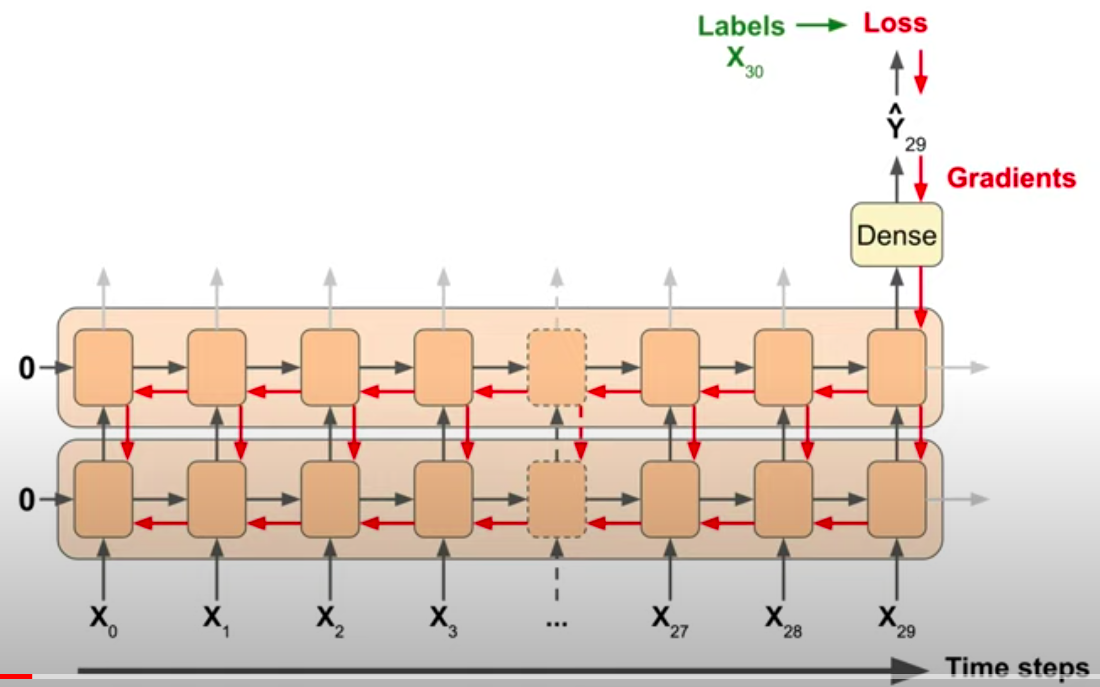

Can't we solve the unstable gradients problem by adding the raw input AND/OR the raw hidden state to the activation at each time step? **Note:** This is referring to a horizontal skip connection. In addition, vertical skip connections (i.e., skip connections between layers) can also be used.